# **Modul 4 : K-Means Clustering**
Nama : Rafi Fadhlillah <br>
NIM : 121450143

# **Tugas individu**
Diantara Dataset 1-5 yang ada, pilih minimal 3 dataset. Kemudian lakukan
klasterisasi K-Means menggunakan code python yang ada pada modul ini. Analisis
data dengan hasil yang anda dapatkan !. Buat laporan dalam file PDF yang berisi: <br>
a) deskripsi data yang anda pilih, <br>
b) flowchart praktikum, <br>
c) hasil dan analisis hasil

### Flowchart

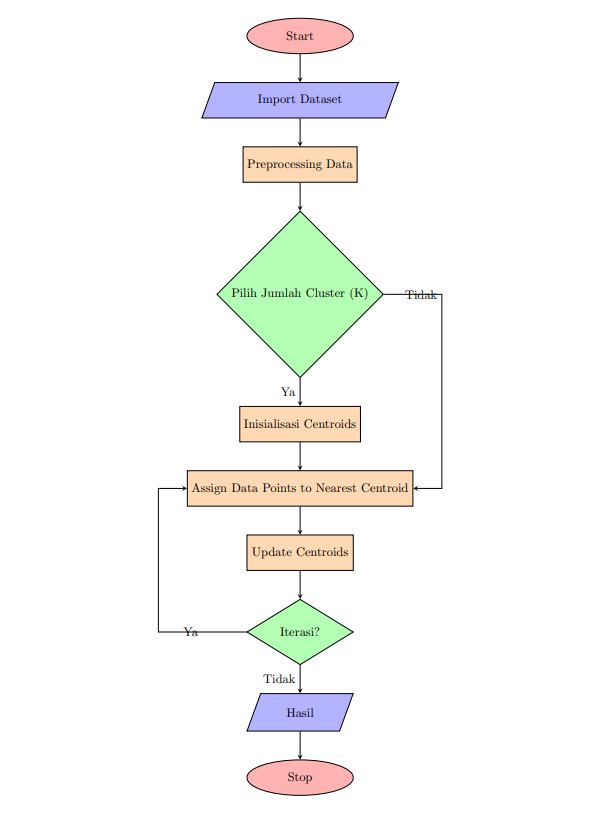

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

Dalam tugas individu kali ini flowchart yang dipakai sama letak perbedaannya hanya pada datasetnya saja

# Dataset 1 : Mall_Customers.csv
Deskripsi atribut data : <br>
* Gender (Jenis Kelamin): menyimpan informasi tentang jenis kelamin pelanggan
* Age (Usia): menyimpan informasi tentang usia pelanggan dalam tahun
* Annual Income (k$) : menyimpan informasi tentang pendapatan tahunan pelanggan dalam ribuan dolar
* Spending Score (1-100) : menyimpan informasi tentang seberapa banyak pelanggan menghabiskan uang mereka, dengan rentang skor antara 1 hingga 100. Skor yang lebih tinggi mungkin menunjukkan pengeluaran yang lebih tinggi.

### 1. Data Loading and description

In [3]:
import pandas as pd

df_mall = pd.read_csv(('/content/drive/MyDrive/PrakDamin/Mall_Customers.csv'), index_col = 'CustomerID')
df_mall.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [4]:
df_mall.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [5]:
# Statistik deskriptif
df_mall.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [6]:
df_mall.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df_mall.duplicated().sum()

0

### 2. Visualization

<Axes: xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

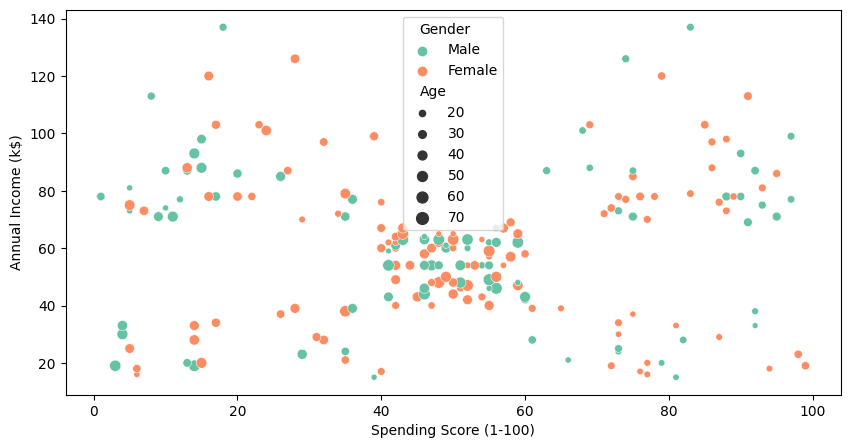

In [8]:
# visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(1, figsize = (10,5))
sns.scatterplot(
    data = df_mall,
    x = 'Spending Score (1-100)',
    y = 'Annual Income (k$)',
    hue = 'Gender',
    size = 'Age',
    palette = 'Set2'
)

Analisis :
Pada plot tersebut, terlihat bahwa ada hubungan positif antara pendapatan tahunan dan skor pengeluaran. Artinya, pelanggan mal dengan pendapatan tahunan yang lebih tinggi cenderung memiliki skor pengeluaran yang lebih tinggi. Hal ini dapat diartikan bahwa pelanggan mal dengan pendapatan tahunan yang lebih tinggi cenderung berbelanja lebih banyak di mal.

Dari plot tersebut, juga terlihat bahwa ada perbedaan skor pengeluaran berdasarkan jenis kelamin. Rata-rata skor pengeluaran pelanggan mal laki-laki lebih tinggi daripada pelanggan mal perempuan. Hal ini dapat diartikan bahwa pelanggan mal laki-laki cenderung berbelanja lebih banyak di mal daripada pelanggan mal perempuan.

Berdasarkan usia, pelanggan mal berusia 30-40 tahun memiliki skor pengeluaran tertinggi. Rata-rata skor pengeluaran pelanggan mal berusia 30-40 tahun adalah 80, lebih tinggi daripada rata-rata skor pengeluaran pelanggan mal di kelompok usia lainnya. Hal ini dapat diartikan bahwa pelanggan mal berusia 30-40 tahun cenderung berbelanja lebih banyak di mal daripada pelanggan mal di kelompok usia lainnya.

Berdasarkan informasi tersebut, dapat disimpulkan bahwa pendapatan tahunan, jenis kelamin, dan usia dapat menjadi faktor yang mempengaruhi skor pengeluaran pelanggan mal. Pelanggan mal dengan pendapatan tahunan yang lebih tinggi, jenis kelamin laki-laki, dan usia 30-40 tahun cenderung memiliki skor pengeluaran yang lebih tinggi.

### 3. Normalizing

In [9]:
# Normalizing
from sklearn import preprocessing

X = df_mall.drop(['Gender', 'Age'], axis = 1)
X_norm = preprocessing.normalize(X)

### 4. Elbow Method

In [10]:
# Elbow method
import numpy as np
from sklearn.cluster import KMeans

def elbow_plot(data, clusters):
    inertia = []
    for n in range(1, clusters):
        algorithm = KMeans(
            n_clusters = n,
            init = 'k-means++',
            random_state = 125,
        )
        algorithm.fit(data)
        inertia.append(algorithm.inertia_)

    #plot
    plt.plot(np.arange(1, clusters), inertia, 'o')
    plt.plot(np.arange(1, clusters), inertia, '-', alpha = 0.5)
    plt.xlabel('Number of Clusters'), plt.ylabel('Inertia')
    plt.show();

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

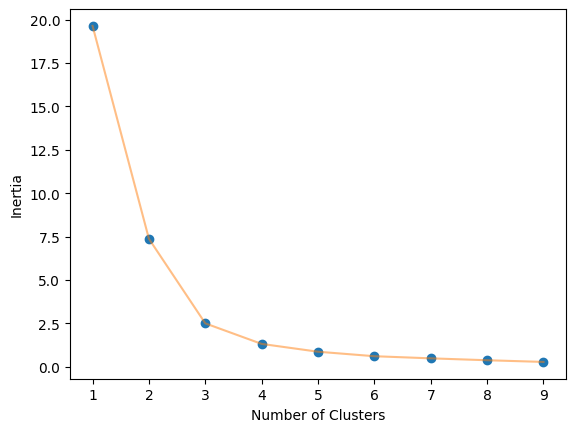

In [11]:
elbow_plot(X_norm, 10)

Analisis : Pada grafik tersebut, terlihat bahwa nilai Inertia mengalami penurunan yang signifikan dari cluster 3 ke cluster 4. Hal ini menunjukkan bahwa titik-titik data dalam cluster 4 lebih tersebar daripada titik-titik data dalam cluster 3.

Berdasarkan grafik tersebut, dapat disimpulkan bahwa jumlah cluster yang optimal adalah 4. Hal ini karena pada cluster 4, nilai Inertia mengalami penurunan yang signifikan, sedangkan pada cluster 5, 6, 7, 8, dan 9, nilai Inertia mulai turun secara perlahan-lahan.

Jumlah cluster yang optimal adalah jumlah cluster di mana nilai Inertia mengalami penurunan yang signifikan. Hal ini menunjukkan bahwa titik-titik data dalam cluster tersebut memiliki karakteristik yang cukup berbeda. Dalam kasus ini, jumlah cluster yang optimal adalah 4.


### 5. K-Means Clustering

In [12]:
#K-Means Clustering
algorithm = KMeans(n_clusters = 4, init = 'k-means++', random_state = 125)
algorithm.fit(X_norm)
labels = algorithm.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


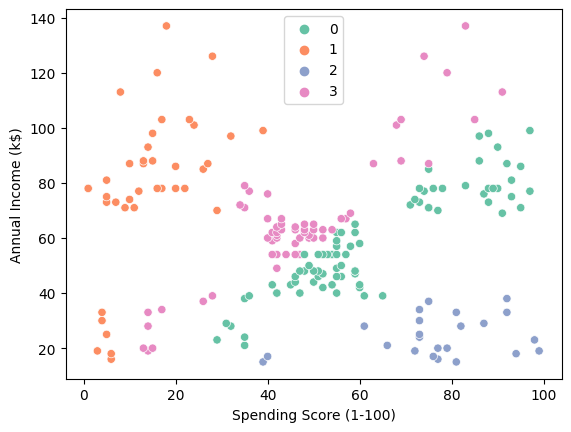

In [13]:
sns.scatterplot(data=X, x = 'Spending Score (1-100)',y = 'Annual Income (k$)', hue = labels, palette = 'Set2');

Analisis hasil K-Means: <br>
“0”: Dari pembelanja tinggi dengan pendapatan tahunan rendah. Pengeluaran rendah  <br>
“1”: Pembelanja rata-rata hingga tinggi dengan pendapatan tahunan menengah
hingga tinggi. dengan pengeluaran juga sedang <br>
“2”: Dari Pembelanja rendah dengan pendapatan tahunan tinggi<br>
Insight ini dapat digunakan untuk membuat iklan yang dipersonalisasi,
meningkatkan loyalitas pelanggan, dan meningkatkan pendapatan.<br>
"3" : pelanggan mal dengan pendapatan tahunan yang tinggi dan skor pengeluaran yang tinggi.

In [14]:
#latih algoritma K_Means pada cluster K=3
algorithm = KMeans(n_clusters = 4, init = 'k-means++', random_state = 125)
algorithm.fit(X_norm)
labels = algorithm.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

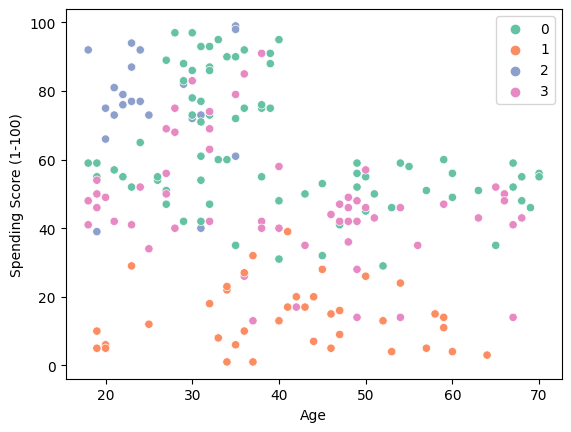

In [15]:
X = df_mall.drop(['Gender', 'Annual Income (k$)'],axis = 1)
#VIsualisasi
sns.scatterplot(data = X, x= 'Age', y = 'Spending Score (1-100)', hue = labels, palette = 'Set2')

Analisis hasil : <br>
“0”: Pembelanjaan tinggi dengan usia muda. <br>
“1”: Pembelanja menengah dari usia paruh baya hingga usia tua. <br>
“2”: Pembelanjaan rendah. usia muda <br>
"3": Pembelanjaan rendah. usia tua

Hasilnya keseluruhan menunjukkan bahwa :
* perusahaan dapat meningkatkan keuntungan dengan
menargetkan individu berusia 20-40 tahun yang memiliki pendapatan yang dapat
dibelanjakan.
* Targetkan masing-masing kelompok pelanggan secara berbeda. Bisnis mall dapat menawarkan produk dan layanan yang berbeda untuk masing-masing kelompok pelanggan.
* Buat promosi atau program khusus untuk menarik masing-masing kelompok pelanggan. Bisnis mall dapat menawarkan promosi atau program khusus untuk menarik masing-masing kelompok pelanggan.

# Dataset 2 : bike-sharing.csv
Deskripsi atribut data :
* dteday: Tanggal (dalam format objek).
* season: Musim dalam bentuk angka (1: musim dingin, 2: musim semi, 3: musim panas, 4: musim gugur).
* yr: Tahun (0: 2011, 1: 2012).
* mnth: Bulan dalam bentuk angka.
* hr: Jam dalam sehari (0 hingga 23).
* holiday: Indikator hari libur (0: bukan libur, 1: libur).
* weekday: Hari dalam seminggu dalam bentuk angka (0: Minggu, 1: Senin, ..., 6: Sabtu).
* workingday: Indikator hari kerja (0: libur atau akhir pekan, 1: hari kerja).
* weathersit: Kondisi cuaca dalam bentuk angka (1: cerah, 2: berawan, 3: salju/hujan ringan, 4: hujan lebat atau salju).
* temp: Suhu dalam derajat Celsius.
* atemp: Suhu yang dirasakan dalam derajat Celsius.
* hum: Kelembaban relatif.
* windspeed: Kecepatan angin.
* casual: Jumlah peminjam sepeda casual.
* registered: Jumlah peminjam sepeda yang terdaftar.
* cnt: Jumlah total sepeda yang dipinjam (casual + registered).

### Data Loading and Description

In [16]:
bike = pd.read_csv(('/content/drive/MyDrive/PrakDamin/Modul 4/bike-sharing.csv'), index_col = "instant")
bike.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [17]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 1 to 17379
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      17379 non-null  object 
 1   season      17379 non-null  int64  
 2   yr          17379 non-null  int64  
 3   mnth        17379 non-null  int64  
 4   hr          17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   weathersit  17379 non-null  int64  
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  hum         17379 non-null  float64
 12  windspeed   17379 non-null  float64
 13  casual      17379 non-null  int64  
 14  registered  17379 non-null  int64  
 15  cnt         17379 non-null  int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 2.3+ MB


In [18]:
bike.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [19]:
bike.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Karena datanya sudah bersih maka bisa dilanjutkan ke tahap selanjutnya

In [20]:
bike.duplicated().sum()

0

### Visualization

<Axes: xlabel='casual', ylabel='registered'>

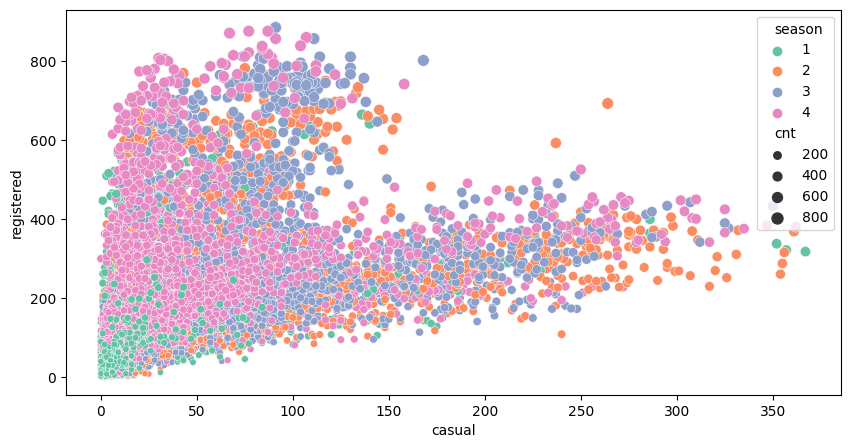

In [21]:
# visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(1 , figsize = (10, 5))
sns.scatterplot(
    data=bike,
    x="casual",
    y = "registered",
    hue = "season",
    size = 'cnt',
    palette = "Set2"
)


Analisis : Pada plot tersebut, terlihat bahwa jumlah sepeda yang digunakan selama musim panas adalah yang paling tinggi. Hal ini dapat diartikan bahwa orang lebih cenderung menggunakan sepeda untuk berkeliling selama musim panas, karena cuacanya lebih hangat dan menyenangkan untuk bersepeda.

Jumlah sepeda yang digunakan selama musim dingin adalah yang terendah. Hal ini dapat diartikan bahwa orang lebih cenderung menggunakan transportasi lain selama musim dingin, karena cuacanya lebih dingin dan tidak nyaman untuk bersepeda.

Jumlah sepeda yang digunakan selama musim semi dan musim gugur berada di antara musim panas dan musim dingin. Hal ini dapat diartikan bahwa jumlah orang yang menggunakan sepeda untuk berkeliling selama musim semi dan musim gugur adalah lebih banyak daripada musim dingin, tetapi lebih sedikit daripada musim panas.

Berdasarkan informasi tersebut, dapat disimpulkan bahwa musim panas adalah musim yang paling populer untuk menggunakan sepeda berbagi. Bisnis sepeda berbagi dapat menargetkan promosi dan programnya selama musim panas untuk menarik lebih banyak pelanggan.

### Normalizing

In [22]:
# Normalizing
from sklearn import preprocessing

bike = bike.drop(columns=['dteday'])
X = bike
X_norm = preprocessing.normalize(X)

### Elbow method

In [23]:
# Elbow method
import numpy as np
from sklearn.cluster import KMeans

def elbow_plot(data, clusters):
    inertia = []
    for n in range(1, clusters):
        algorithm = KMeans(
            n_clusters = n,
            init = 'k-means++',
            random_state = 125,
        )
        algorithm.fit(data)
        inertia.append(algorithm.inertia_)

    #plot
    plt.plot(np.arange(1, clusters), inertia, 'o')
    plt.plot(np.arange(1, clusters), inertia, '-', alpha = 0.5)
    plt.xlabel('Number of Clusters'), plt.ylabel('Inertia')
    plt.show();


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

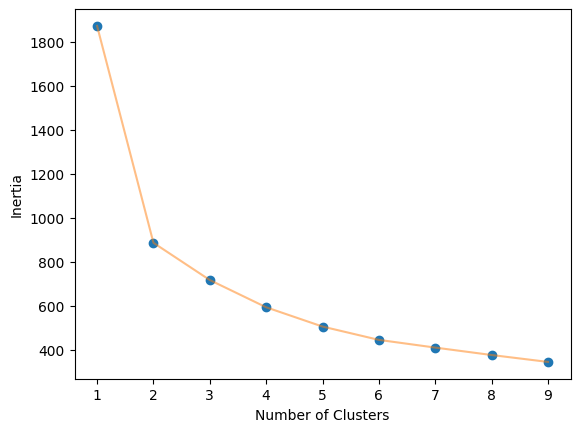

In [24]:
elbow_plot(X_norm, 10)

Analisis : Plot elbow method di atas menunjukkan nilai WCSS (Within Cluster Sum of Squares) untuk jumlah cluster yang berbeda. WCSS adalah ukuran seberapa tersebar titik-titik data dalam cluster. Nilai WCSS yang rendah menunjukkan bahwa titik-titik data dalam cluster berada dekat dengan pusat cluster.

Pada plot tersebut, terlihat bahwa nilai WCSS mengalami penurunan yang signifikan dari cluster 2 ke cluster 3. Hal ini menunjukkan bahwa titik-titik data dalam cluster 3 lebih tersebar daripada titik-titik data dalam cluster 2.

Pada titik ini, nilai WCSS mulai turun secara perlahan-lahan. Hal ini menunjukkan bahwa titik-titik data dalam cluster 4, 5, dan 6 tidak terlalu berbeda dalam hal penyebarannya.

Berdasarkan grafik tersebut, dapat disimpulkan bahwa jumlah cluster yang optimal adalah 3. Hal ini karena pada cluster 3, nilai WCSS mengalami penurunan yang signifikan, sedangkan pada cluster 4, 5, dan 6, nilai WCSS mulai turun secara perlahan-lahan.

### K-Means Clustering

In [25]:
#K-Means Clustering
algorithm = KMeans(n_clusters=3, init="k-means++", random_state=125)
algorithm.fit(X_norm)
labels = algorithm.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


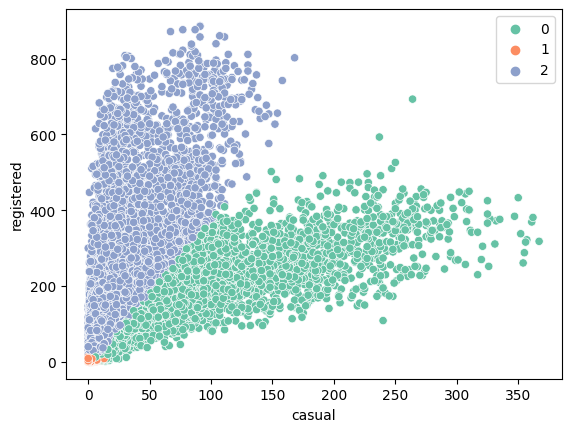

In [26]:
sns.scatterplot(data=X,
                x = 'casual',
                y = 'registered',
                hue = labels,
                palette = 'Set2');

Analisis : <br>
"0" : cenderung menggunakan sepeda pada hari kerja dan jam sibuk, seperti pagi dan sore hari.<br>
"1" : cenderung menggunakan sepeda pada hari libur dan akhir pekan.<br>
"2" : cenderung menggunakan sepeda pada waktu-waktu tertentu saja, seperti untuk pergi berbelanja atau berolahraga.

Berdasarkan hasil analisis ini, berikut adalah beberapa saran untuk bisnis sewa sepeda :

* Tawarkan produk dan layanan yang berbeda untuk masing-masing kelompok pengguna. Misalnya, bisnis sewa sepeda  dapat menawarkan paket berlangganan bulanan untuk pengguna sepeda di cluster 0, paket berlangganan harian untuk pengguna sepeda  di cluster 1, dan paket berlangganan per perjalanan untuk pengguna sewa sepeda di cluster 2.
* Buat promosi atau program khusus untuk menarik masing-masing kelompok pengguna. Misalnya, bisnis sewa sepeda dapat menawarkan diskon untuk pengguna sepeda di cluster 0 yang menggunakan sepeda pada hari kerja dan jam sibuk. Bisnis sewa sepeda juga dapat menawarkan diskon untuk pengguna sepeda  di cluster 1 yang menggunakan sepeda pada hari libur dan akhir pekan.
* Tingkatkan ketersediaan sepeda di lokasi-lokasi yang sering dikunjungi oleh masing-masing kelompok pengguna. Misalnya, bisnis sewa sepeda dapat meningkatkan ketersediaan sepeda di dekat stasiun kereta api dan tempat kerja untuk pengguna sepeda di cluster 0. Bisnis sewa sepeda juga dapat meningkatkan ketersediaan sepeda di tempat-tempat wisata dan taman untuk pengguna sepeda di cluster 1.

# Dataset 3 : Instagram Visit Clustering
Deskripsi Atribut data :
* Instagram Visit Score: mencerminkan skor atau nilai yang diberikan kepada kunjungan atau aktivitas pengguna pada Instagram
* Spending Rank (0 to 100): mencerminkan peringkat waktu penggunaan instagram oleh pengguna dalam rentang 0 hingga 100.

### Data loading and description

In [27]:
ig = pd.read_csv(('/content/drive/MyDrive/PrakDamin/Modul 4/Instagram visits clustering.csv'), index_col = "User ID")
ig.tail()

,Instagram visit score,Spending_rank(0 to 100)
User ID,,
2595,25,25.745908
2596,52,9.275066
2597,100,84.999487
2598,87,20.530806
2599,34,76.388622


In [28]:
ig.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2600 entries, 0 to 2599
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Instagram visit score    2600 non-null   int64  
 1   Spending_rank(0 to 100)  2600 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 60.9 KB


In [29]:
ig.describe()

,Instagram visit score,Spending_rank(0 to 100)
count,2600.000000,2600.000000
mean,63.323462,42.848408
std,26.579760,28.758349
min,5.000000,0.940709
25%,38.000000,19.452098
50%,72.000000,28.013082
75%,86.000000,72.116945
max,118.000000,107.349821


In [30]:
ig.isnull().sum()

Instagram visit score      0
Spending_rank(0 to 100)    0
dtype: int64

In [31]:
ig.duplicated().sum()

0

### Visualization

<Axes: xlabel='Spending_rank(0 to 100)', ylabel='Instagram visit score'>

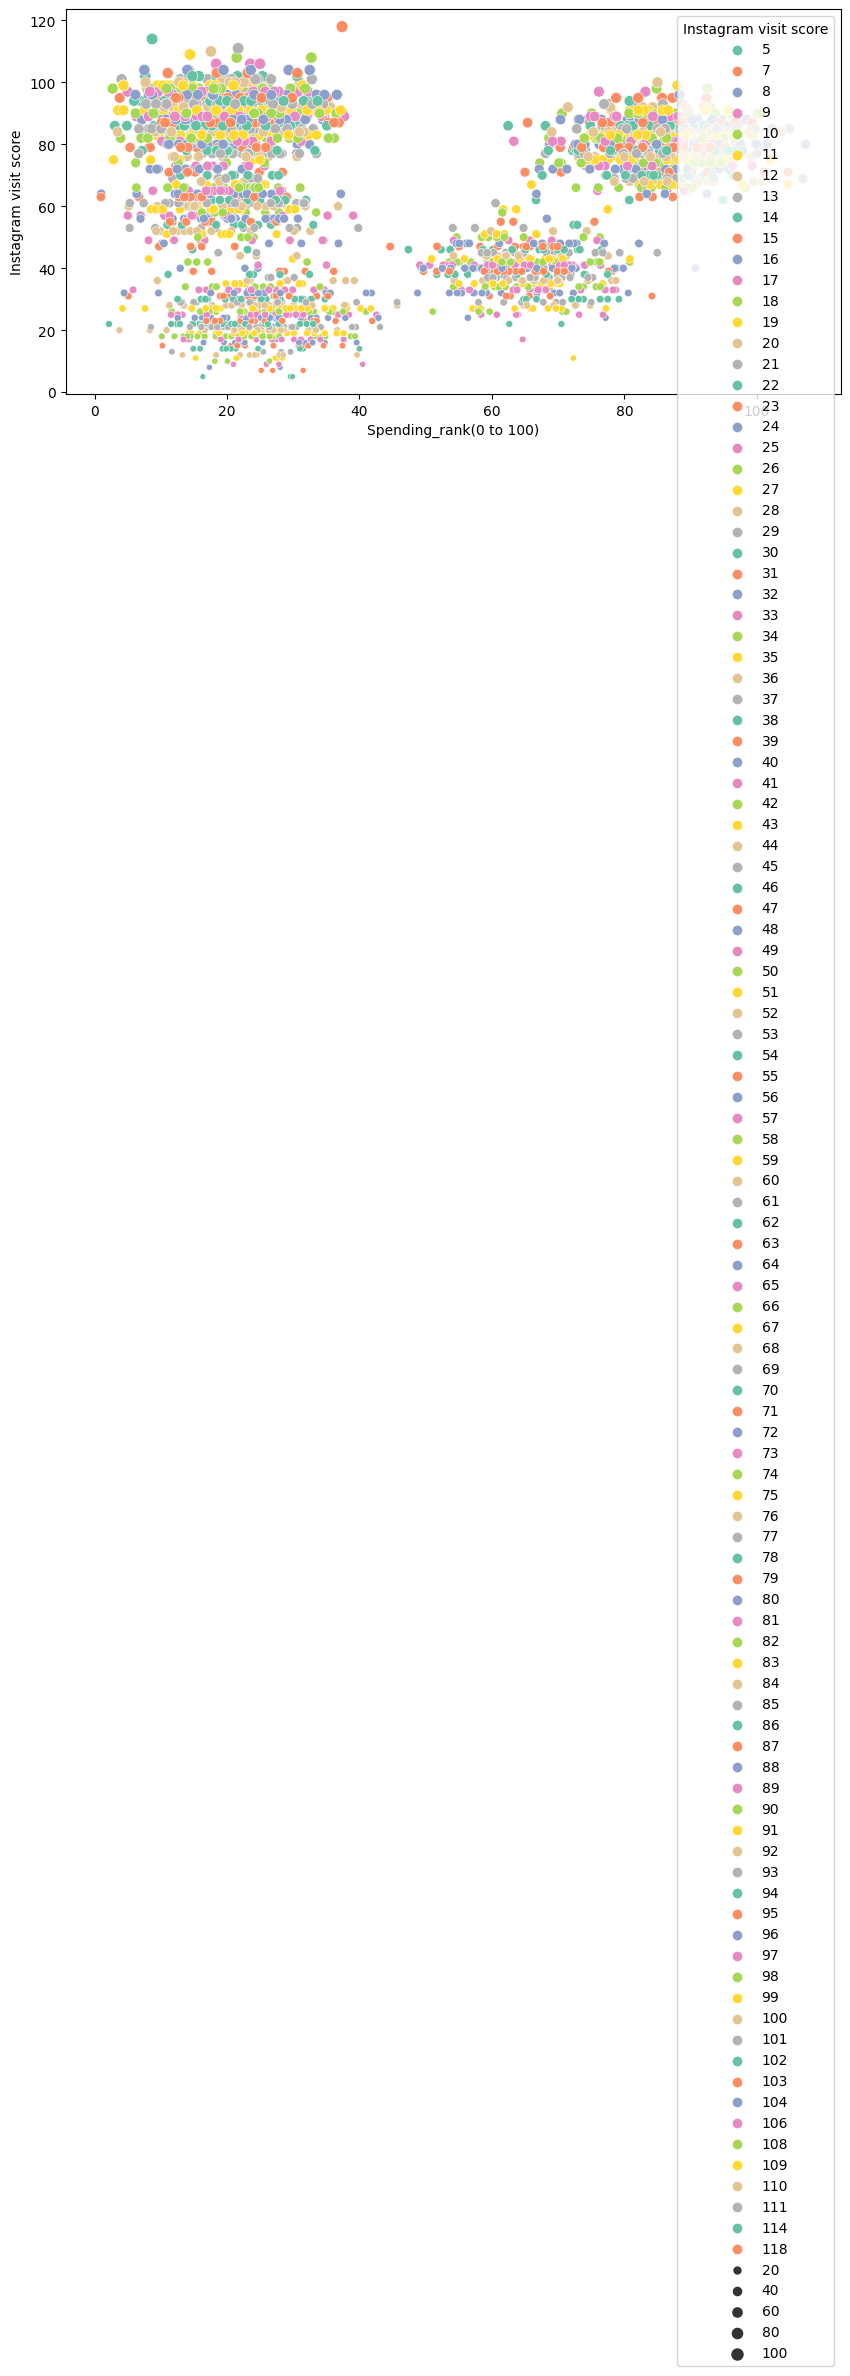

In [32]:
# visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(1 , figsize = (10, 5))
sns.scatterplot(
    data=ig,
    x="Spending_rank(0 to 100)",
    y = "Instagram visit score",
    hue = "Instagram visit score",
    size = "Instagram visit score",
    palette = "Set2"
)

### Normalizing

In [33]:
# Normalizing
from sklearn import preprocessing

X = ig
X_norm = preprocessing.normalize(X)

### Elbow method

In [34]:
# Elbow method
import numpy as np
from sklearn.cluster import KMeans

def elbow_plot(data, clusters):
    inertia = []
    for n in range(1, clusters):
        algorithm = KMeans(
            n_clusters = n,
            init = 'k-means++',
            random_state = 125,
        )
        algorithm.fit(data)
        inertia.append(algorithm.inertia_)

    #plot
    plt.plot(np.arange(1, clusters), inertia, 'o')
    plt.plot(np.arange(1, clusters), inertia, '-', alpha = 0.5)
    plt.xlabel('Number of Clusters'), plt.ylabel('Inertia')
    plt.show();


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

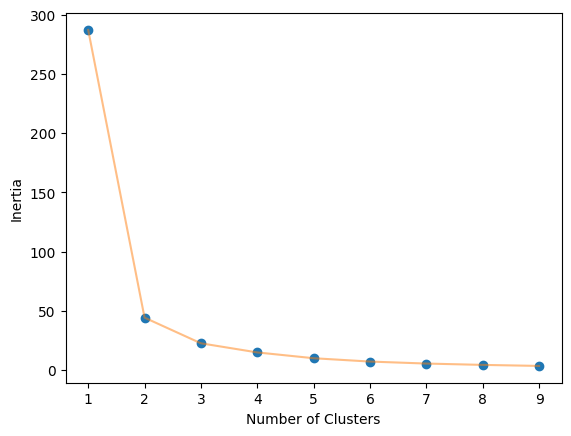

In [35]:
elbow_plot(X_norm, 10)

Analisis : Grafik di atas menunjukkan nilai WCSS (Within Cluster Sum of Squares) untuk jumlah cluster yang berbeda. WCSS adalah ukuran seberapa tersebar titik-titik data dalam cluster. Nilai WCSS yang rendah menunjukkan bahwa titik-titik data dalam cluster berada dekat dengan pusat cluster.

Pada grafik tersebut, terlihat bahwa nilai WCSS mengalami penurunan yang signifikan dari cluster 2 ke cluster 3. Hal ini menunjukkan bahwa titik-titik data dalam cluster 3 lebih tersebar daripada titik-titik data dalam cluster 2.

Pada titik ini, nilai WCSS mulai turun secara perlahan-lahan. Hal ini menunjukkan bahwa titik-titik data dalam cluster 4, 5, dan 6 tidak terlalu berbeda dalam hal penyebarannya.

Berdasarkan grafik tersebut, dapat disimpulkan bahwa jumlah cluster yang optimal adalah 3. Hal ini karena pada cluster 3, nilai WCSS mengalami penurunan yang signifikan, sedangkan pada cluster 4, 5, dan 6, nilai WCSS mulai turun secara perlahan-lahan.

### K-Means Clustering

In [36]:
#K-Means Clustering
algorithm = KMeans(n_clusters=3, init="k-means++", random_state=125)
algorithm.fit(X_norm)
labels = algorithm.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


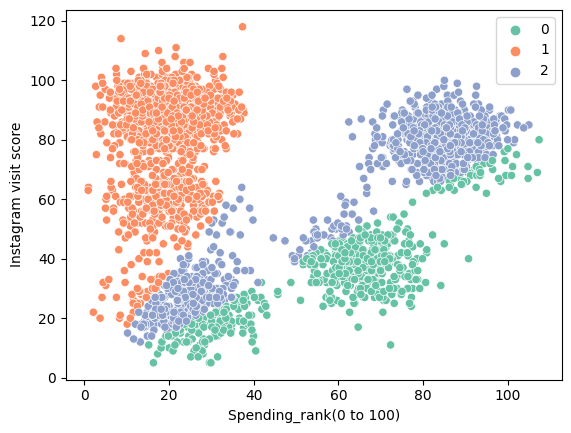

In [37]:
sns.scatterplot(data=X,
                x = 'Spending_rank(0 to 100)',
                y = 'Instagram visit score',
                hue = labels,
                palette = 'Set2');

Analisis : <br>
"0" : Cluster ini berisi akun-akun dengan jumlah kunjungan Instagram lebih rendah dan peringkat penggunaan aplikasi lebih rendah.<br>
"1" : Cluster ini berisi akun-akun dengan jumlah kunjungan Instagram tinggi dan peringkat penggunaan aplikasi yang rendah. <br>
"2" : Cluster ini berisi akun-akun dengan jumlah kunjungan Instagram yang jumlah kunjungan tidak tinggi maupun rendah dan peringkat penggunaan aplikasi yang rendah yang bervariasi dari rendah sampai tinggi.

Berikut adalah saran bisnis berdasarkan hasil analisis tersebut:<br>
* Targetkan akun-akun ini dengan konten yang relevan dengan minat mereka. Misalnya, jika akun-akun ini mengikuti akun teman atau keluarga, bisnis dapat menargetkan mereka dengan konten yang menarik bagi teman atau keluarga mereka.
* Buat konten yang kreatif dan interaktif. Konten yang kreatif dan interaktif dapat menarik perhatian akun-akun ini dan mendorong mereka untuk menggunakan Instagram lebih sering.
* Gunakan fitur-fitur Instagram yang canggih. Bisnis dapat menggunakan fitur-fitur Instagram yang canggih, seperti Instagram Stories, Instagram Live, atau Instagram Reels, untuk membuat konten yang lebih menarik dan interaktif.
